## Week 7 Lesson 4 part 2: Fitting
<hr style="height: 3.0px"/>

Let's take a look at a more advanced fitting package for this week.  
    
**Part 2**:  new package: `lmfit` https://lmfit.github.io/lmfit-py/  
>    1. We will first learn to install a new package to our Python installation  
>    2. Application: Cystallization Kinetics of an ionic liquid (Royal Society of Chemistry Advances >(RSC Adv.), 2014, vol. 4, p. 22277)  
>    3. Fitting (deconvolution) of two overlapping peaks in calorimetry data  

Much of this lesson is taken from:
https://chrisostrouchov.com/post/peak_fit_xrd_python/   

The first thing you need to do is install the new package "lmfit" as explained in the short video below. If the video below isn't working, you can go directly to the youtube link: https://youtu.be/R8FX2G8m6XM
    

In [1]:
from IPython.display import HTML, IFrame

# Youtube
#HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/R8FX2G8m6XM?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')
IFrame("https://www.youtube.com/embed/R8FX2G8m6XM",870,613)

In [1]:
# import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, signal

from lmfit import models, Model, Parameters

Gaussian peak function: 
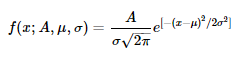

> Aside:  to get greek letters in code cells type \sigma and then press tab key

In [2]:
# Here's our function, g, for the Gaussian
def g(x, A, μ, σ):
    return A/(σ*np.sqrt(2*np.pi)) * np.exp(-1/2*((x - μ) / σ)**2)
# A is the amplitude
# μ is the peak mean
# σ is the standard deviation

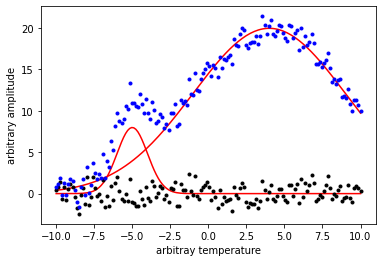

In [3]:
# Generate some data for two peaks.
g_0 = [250.0, 4.0, 5.0] # [A,μ,σ] peak centered at 4
g_1 = [20.0, -5.0, 1.0] # [A,μ,σ] peak centered at -5
n = 150 # number of points
x = np.linspace(-10, 10, n) #generate our x data
noise=np.random.randn(n)
y = g(x, *g_0) + g(x, *g_1) + noise #generating some data with random noise
# the star operator used in the above line is discussed below

plt.plot(x, g(x, *g_0), 'r-'); #peak at 4
plt.plot(x, g(x, *g_1), 'r-'); #peak at -5
plt.plot(x, noise, 'k.'); #noise
plt.plot(x, y, 'b.'); #sum of the above
plt.ylabel('arbitrary amplitude');
plt.xlabel('arbitray temperature');

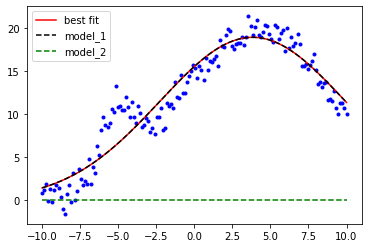

{'m2_A': 1.7350466730237102e-05, 'm2_μ': -0.5186944717113775, 'm2_σ': 38.183948658299975, 'm1_A': 290.19340490259265, 'm1_μ': 3.8314432569533663, 'm1_σ': 6.1067063755584305}


In [4]:
# Follow these steps to use the lmfit package 

# Here's our function, g, for the Gaussian
def g(x, A, μ, σ):
    return A/(σ*np.sqrt(2*np.pi)) * np.exp(-1/2*((x - μ) / σ)**2)
# A is the amplitude
# μ is the peak mean
# σ is the standard deviation

# when using a function more than once it is useful to define a prefix to separate variables
# for example, the amplitude in model_1 will now be called m1_A
# likewise in model_2 it will be m2_A

model_1 = Model(g, prefix='m1_') # using my own definition
model_2 = Model(g, prefix='m2_') # using my own definition
model = model_1 + model_2

# now we help the fitting process by giving starting values and bounds on our parameters
params = Parameters()
# parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('m1_A', 3, True, 0, None, None, None),
                ('m1_μ', 5, True, 0,10, None, None),
                ('m1_σ', 1, True, 0, None, None, None),
                ('m2_A', 1, True, 0, None, None, None),
                ('m2_μ', -3, True, -10, 0, None, None),
                ('m2_σ', 1, True, 0, None, None, None))

result = model.fit(y, params, x=x) #now we perform the fit to our x & y data with the given params
comps = result.eval_components() #this separates the results into the two components model_1 and model_2

plt.plot(x, y, 'b.')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.plot(x, comps['m1_'], 'k--', label='model_1') 
plt.plot(x, comps['m2_'], 'g--', label='model_2')
plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result.best_values)

## So that is not looking so good!  Let's tweak our params to see if we can help the fit. 

#### Below I reduced my "help"  by only giving initial values.  I think my initial guess for the amplitudes was off enough that my constraints we too tight on the other variables.  

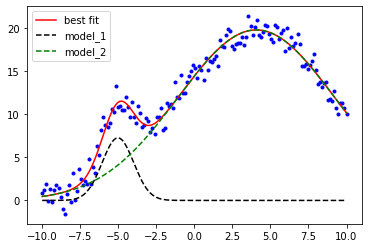

{'m2_A': 254.6699280421851, 'm2_μ': 4.073421865282077, 'm2_σ': 5.127430868234604, 'm1_A': 18.789160601874862, 'm1_μ': -5.023121357608037, 'm1_σ': 1.0300192470427487}


In [5]:
params = Parameters()
#parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('m1_A', 3, True, None, None, None, None),
                ('m1_μ', 5, True, None, None, None, None),
                ('m1_σ', 1, True, None, None, None, None),
                ('m2_A', 1, True, None, None, None, None),
                ('m2_μ', -3, True, None, None, None, None),
                ('m2_σ', 1, True, None, None, None, None))

result = model.fit(y, params, x=x) #now we perform the fit to our x & y data with the given params
comps = result.eval_components() #this separates the results into the two components model_1 and model_2

plt.plot(x, y, 'b.')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.plot(x, comps['m1_'], 'k--', label='model_1') 
plt.plot(x, comps['m2_'], 'g--', label='model_2')
plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result.best_values)

**Now we have a nice fit!**

#### Let's look at how to use our fit parameters to plot the gaussian function.  The fit parameters are found in variable "result" by asking for the best values, i.e. result.best_values  

In [6]:
vals=result.best_values
print(vals) #notice values are returned as a dictionary
#to get a single value use the "key" for example
vals['m2_μ'] # using key m2_μ

{'m2_A': 254.6699280421851, 'm2_μ': 4.073421865282077, 'm2_σ': 5.127430868234604, 'm1_A': 18.789160601874862, 'm1_μ': -5.023121357608037, 'm1_σ': 1.0300192470427487}


4.073421865282077

In [7]:
# or to get a list of just values of the dictionary
list(vals.values())

[254.6699280421851,
 4.073421865282077,
 5.127430868234604,
 18.789160601874862,
 -5.023121357608037,
 1.0300192470427487]

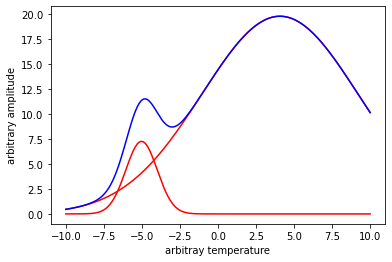

In [8]:
n = 150 # number of points
x = np.linspace(-10, 10, n) #generate our x data
# recall our function g() has 4 params in this order g(x, )
y1=g(x, vals['m1_A'], vals['m1_μ'],vals['m1_σ']) 
y2=g(x, vals['m2_A'], vals['m2_μ'],vals['m2_σ'])
ysum= y1+y2

plt.plot(x, y1, 'r-'); 
plt.plot(x, y2, 'r-'); 
plt.plot(x, ysum, 'b-'); 
plt.ylabel('arbitrary amplitude');
plt.xlabel('arbitray temperature');

<hr style="height: 3px" \> 

# So that's the idea... now you try it.  
<hr style="height: 3px" \>

<hr style="height:1px"\>

**Problem 1:** reproduce the data below.  You will need all three curves.  The green (thick) curve is the measured data from DSC. Let's call this **"dsc_data"**.  The peaks labeled P1 and P2 are the fitted curves found by the authors. Let's call these **"p1_auth_data"** and **"p2_auth_data"**.  
<hr style="height:1px"\>

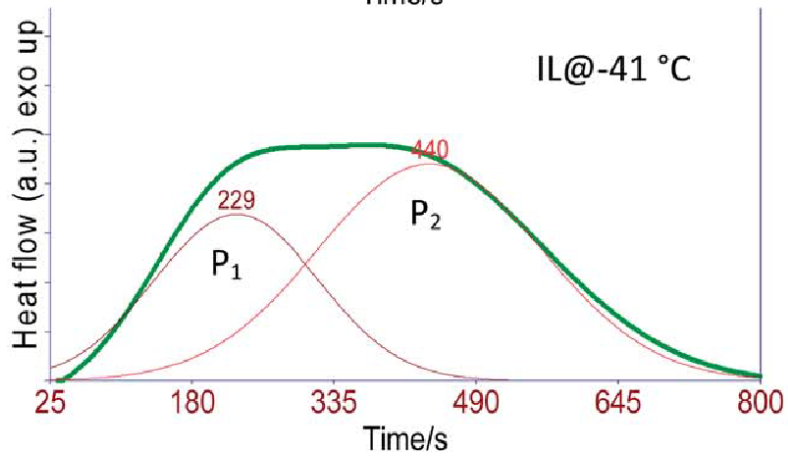

<hr style="height:1px"\>

**Problem 2:** fit the three data sets (dsc_data, p1_auth_data, and p2_auth_data) you just created.  I'll refer to these as "*fit_dsc*", "*fit_p1_auth*" and "*fit_p2_auth*".   Plot each fit along with your data sets to ensure an adequate fit especially for dsc_data. 
<hr style="height:1px"\>

<hr style="height:1px"\>

**Problem 3:**  
1. Take your fits to P1 (fit_p1_auth) and P2 (fit_p2_auth) and add them together. You can do this by placing your fit parameters back into the g() function and summing, i.e. g(x, p1 params) + g(x, p2 params).  This is then the fit that the authors got to the overall curve.  
2. Plot the author's fit (sum from 1.) along with the overall data curve (dsc_data) and your fit to the overall curve (fit_dsc).  How does your fit compare to the author's fit?  
3. Separate your overall fit (fit_dsc) into its two components (peaks).  Plot your two components (```comps['m1_']``` and ```comps['m2_']``` if you used the same prefix I did in the lesson) along with the author's P1 (fit_p1_auth) and P2 (fit_p2_auth).  How do these compare?
4.  If the area under the curve P1 and P2 represent the relative amounts of each phase 1 and 2, do your results suggest an increase or decrease in the relative amount of P1/P2.  You do not need to calculate anything here.  Just eyeball it. 

<hr style="height:1px"\>

Now there really isn't any reason to assume a gaussian profile for the DSC data as the authors in this paper have done.  In fact, we expect the kinetics of crystallization to follow avrami kinetics.  These are the "S" shaped curves we looked at in MSE 2044 Phase Transformations and in last weeks lesson.  The avrami curve has the form 

The peak in the DSC data should just be the derivative of the avrami equation.  

Derivative of Avrami

# $$k n t^{n-1} e^{-k t^n}$$

The above equation is given in normalized form below, i.e. the height = 1 and peak position = 1

# $$e^{-\frac{(n-1) \left(t^n-1\right)}{n}} t^{n-1}$$

So to fit to an arbitrary amplitude, A, and peak position, B we could write: 

## $$\text{A } e^{-\frac{(\text{n}-1) \left(\left(\frac{t}{\text{B}}\right)^{\text{n}}-1\right)}{\text{n}}} \left(\frac{t}{\text{B}}\right)^{\text{n}-1}$$

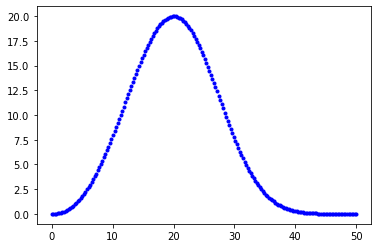

In [3]:
# Avrami peak function as derived above: 
def pAvram(x, A, B, n):
    return A*((x/B)**(n-1))*np.exp(-((n-1)*(((x/B)**n)-1))/n)

x=np.linspace(0, 50, 200)
y=pAvram(x,20,20,3.23)

plt.plot(x, y, 'b.');

<hr style="height:1px"\>

**Problem 4:**  
1. Refit the dsc_data now using the pAvram function we just developed.  
2. Compare this fit to the author's fit and our gaussian fit.  Which fit is the best by eye?  
3. Plot the components of this avrami fit compared to the author's fit.  How do the peaks P1 and P2 compare?  How about the ratio of P1/P2.  

<hr style="height:1px"\>

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import sympy as sym
from sympy import solve
from pathlib import Path


# pixel data stored in variable "pixel_positions"
# if this function throws an error stating object not an 8-bit string...
# then wrap "image_file" with str() before calling function e.g. selectdata(str(file_path))
def selectdata(image_file):
    
    #now we have 1 row and 2 columns i.e. 2 figures in a row
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(9, 4))
    # gridspec_kw={'width_ratios': [2, 2]} can be used above if needed

    # turn off the x, y axis on the image - the axis doesn't make sense for an image
    ax1.axis(False)
    
    img = mpimg.imread(image_file) #matplotlib

    image_axis = fig.add_axes([0, 0, 0.47, 0.9], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
    image_axis.imshow(img)
    image_axis.axis('off')

    # recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
    ydim=img.shape[0]

    # setting title and labels for ax1 (figure on the left)
    ax1.set_title('Click on data you want to collect below')
    ax1.set_xlabel('x-pixel position')
    ax1.set_ylabel('y-pixel position')

    global pixel_positions #makes pixel_positions a global variable so we have access to it outside this function
    pixel_positions = []
    def onclick(event):
        if event.button==1:
            pixel_positions.append([event.xdata,ydim-event.ydata])
            ax2.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
            ax2.scatter(event.xdata, ydim-event.ydata,marker='o', c='r', edgecolor='b') #adding scatter plot
        
#         elif event.button==3:
#             fig.canvas.mpl_disconnect(cid)
#             plt.close(fig)
    
    cid=fig.canvas.mpl_connect('button_press_event', onclick) 
    fig.show()
    
# enter list of three pixel points and list of three corresponding plot points 

# ****** changed this to take a list of three points for pixels and one for the corresponding plot calibration pts *********    
def cal(pixpts, plotpts, datatoconvert):    
    
    xpx1, ypx1 = pixpts[0]
    x1, y1 = plotpts[0]
    xpx2, ypx2 = pixpts[1]
    x2, y2 = plotpts[1]
    xpx3, ypx3 = pixpts[2]
    x3, y3 = plotpts[2]
    
    # general solution for calibration constants
    m11=(x1*ypx2 - x1*ypx3 - x2*ypx1 + x2*ypx3 + x3*ypx1 - x3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m12=-(x1*xpx2 - x1*xpx3 - x2*xpx1 + x2*xpx3 + x3*xpx1 - x3*xpx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m21=(y1*ypx2 - y1*ypx3 - y2*ypx1 + y2*ypx3 + y3*ypx1 - y3*ypx2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    m22=-(-xpx1*y2 + xpx1*y3 + xpx2*y1 - xpx2*y3 - xpx3*y1 + xpx3*y2)/(xpx1*ypx2 - xpx1*ypx3 - xpx2*ypx1 + xpx2*ypx3 + xpx3*ypx1 - xpx3*ypx2)
    Ox=(-x1*xpx2*y3 + x1*xpx3*y2 + x2*xpx1*y3 - x2*xpx3*y1 - x3*xpx1*y2 + x3*xpx2*y1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    Oy=(x1*y2*ypx3 - x1*y3*ypx2 - x2*y1*ypx3 + x2*y3*ypx1 + x3*y1*ypx2 - x3*y2*ypx1)/(x1*y2 - x1*y3 - x2*y1 + x2*y3 + x3*y1 - x3*y2)
    
    # define our calibrated transf matrix, m_cal, and our calibrated offset, offset_cal
    m_cal=[[m11, m12],[m21,m22]]
    offset_cal=[Ox, Oy]
    
    # return as numpy arrays
    # return(np.array(m_cal), np.array(offset_cal))
    plot_data=np.array([np.matmul(m_cal, point-offset_cal) for point in np.array(datatoconvert)])

    return(plot_data)

<IPython.core.display.Javascript object>


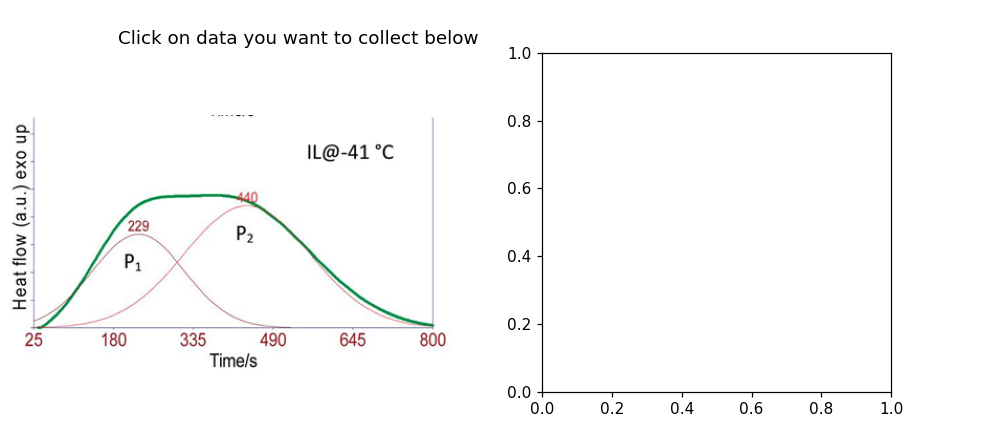

In [8]:
path=Path("C:/Users/sgc/Google Drive/Teaching/2114 & 3114 Math I & II/3114 Python/images")
filename='peak deconvolution.png'
fullpath=path / filename
# if getting error about object not appearing to be 8-bit string path then use
# selectdata(str(fullpath))
selectdata(fullpath)

In [7]:
pixel_positions

[[412.9791570352324, 40.35062377785397],
 [32.15173386738373, 40.35062377785397],
 [31.099724411118956, 224.45227862418966]]

In [5]:
# here are the values I obtained after using the selectdata() function several times
# including them here so I don't have to keep selecting points everytime
# I open this notebook new

pixpts = [[411.657579787234, 40.48431209807703],
 [29.778147163120565, 41.536325567439405],
 [30.83015661938534, 225.6379804137751]]
plotpts = [[800,0],[25,0],[25,1]]
dsc_data = [[411.65757978723406, 43.640344479968945],
 [404.2935135933806, 45.744363392498485],
 [392.7214095744681, 47.84838230502805],
 [380.0972960992908, 49.95240121755759],
 [368.52519208037825, 55.212448498881486],
 [356.95308806146573, 61.524505236470134],
 [342.22495567375887, 69.94058088658832],
 [324.3407949172577, 83.6167038180304],
 [315.9247192671395, 92.03277946814862],
 [305.4046247044917, 101.50086457453159],
 [295.93653959810877, 110.96894968091456],
 [283.31242612293147, 124.64507261235664],
 [267.5322842789598, 140.4252144563283],
 [253.85616134751774, 150.94530901897605],
 [243.33606678486998, 158.30937521282948],
 [232.81597222222223, 163.56942249415334],
 [225.4519060283688, 165.67344140668288],
 [211.77578309692672, 166.72545086294767],
 [199.15166962174942, 167.77746031921245],
 [188.63157505910166, 165.67344140668288],
 [179.1634899527187, 165.67344140668288],
 [167.59138593380615, 165.67344140668288],
 [158.12330082742318, 165.67344140668288],
 [148.65521572104018, 164.62143195041813],
 [139.1871306146572, 161.4654035816238],
 [131.82306442080377, 159.36138466909424],
 [126.56301713947991, 155.15334684403516],
 [120.25096040189125, 148.84129010644648],
 [113.9389036643026, 142.52923336885783],
 [108.67885638297872, 135.1651671750044],
 [102.36679964539007, 126.74909152488621],
 [99.21077127659575, 121.48904424356232],
 [93.95072399527187, 114.12497804970891],
 [88.690676713948, 104.65689294332591],
 [79.22259160756501, 89.92876055561908],
 [72.91053486997636, 79.40866599297132],
 [66.59847813238771, 70.9925903428531],
 [60.286421394799056, 61.524505236470134],
 [53.9743646572104, 56.26445795514627],
 [49.7663268321513, 51.00441067382238],
 [45.5582890070922, 46.79637284876327],
 [41.3502511820331, 43.640344479968945]]

p1_auth_data = [[263.32424645390074, 42.237662529550846],
 [253.85616134751774, 42.237662529550846],
 [243.33606678486998, 44.341681442080414],
 [232.81597222222223, 46.445700354609954],
 [221.2438682033097, 50.65373817966906],
 [209.67176418439718, 58.017804373522495],
 [198.09966016548464, 67.48588947990547],
 [190.7355939716312, 75.90196513002365],
 [178.1114804964539, 89.57808806146573],
 [169.6954048463357, 101.15019208037828],
 [163.38334810874704, 108.51425827423171],
 [154.96727245862886, 117.98234338061468],
 [144.4471778959811, 126.3984190307329],
 [137.08311170212767, 129.55444739952722],
 [131.82306442080377, 130.60645685579198],
 [125.51100768321513, 128.50243794326244],
 [118.14694148936171, 126.3984190307329],
 [112.88689420803783, 122.19038120567379],
 [108.67885638297872, 117.98234338061468],
 [101.3147901891253, 111.67028664302603],
 [95.00273345153664, 105.35822990543738],
 [89.74268617021276, 99.04617316784874],
 [84.48263888888889, 92.73411643026006],
 [77.11857269503547, 84.31804078014187],
 [71.85852541371159, 78.00598404255322],
 [64.49445921985816, 69.589908392435],
 [57.13039302600473, 63.27785165484636],
 [49.7663268321513, 56.96579491725771],
 [42.402260638297875, 52.7577570921986],
 [37.142213356974, 49.60172872340428],
 [32.934175531914896, 48.549719267139494]]

p2_auth_data = [[403.24150413711584, 43.28967198581563],
 [394.8254284869976, 44.341681442080414],
 [383.2533244680851, 46.445700354609954],
 [369.57720153664303, 49.60172872340428],
 [359.0571069739953, 54.86177600472814],
 [346.43299349881795, 61.17383274231682],
 [333.80888002364065, 70.64191784869979],
 [320.1327570921986, 82.2140218676123],
 [306.4566341607565, 96.94215425531917],
 [295.93653959810877, 110.61827718676125],
 [287.52046394799055, 120.08636229314422],
 [279.10438829787233, 129.55444739952722],
 [268.5842937352246, 139.0225325059102],
 [262.27223699763596, 145.33458924349884],
 [253.85616134751774, 151.6466459810875],
 [247.5441046099291, 155.8546838061466],
 [242.2840573286052, 155.8546838061466],
 [239.12802895981088, 155.8546838061466],
 [237.02401004728134, 156.90669326241138],
 [230.7119533096927, 156.90669326241138],
 [226.50391548463358, 155.8546838061466],
 [220.19185874704493, 153.75066489361706],
 [211.77578309692672, 149.54262706855795],
 [203.35970744680853, 142.17856087470452],
 [195.9956412529551, 135.86650413711587],
 [190.7355939716312, 130.60645685579198],
 [183.37152777777777, 122.19038120567379],
 [177.05947104018912, 114.82631501182036],
 [169.6954048463357, 105.35822990543738],
 [163.38334810874704, 99.04617316784874],
 [152.8632535460993, 86.42205969267141],
 [143.39516843971631, 76.95397458628844],
 [132.87507387706856, 67.48588947990547],
 [119.19895094562648, 59.06981382978725],
 [105.5228280141844, 51.70574763593385],
 [92.89871453900709, 48.549719267139494],
 [89.74268617021276, 47.49770981087471],
 [81.32661052009456, 45.39369089834517],
 [72.91053486997636, 44.341681442080414],
 [64.49445921985816, 42.237662529550846],
 [56.078383569739955, 42.237662529550846]]

Plot of the DSC data and the authors P1 and P2 fits.  

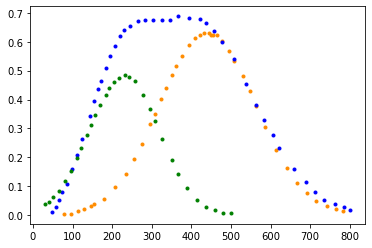

In [6]:
%matplotlib inline
# first use cal() to convert our pixel points to plot points
cal_dsc=cal(pixpts, plotpts, dsc_data)
cal_p1_auth=cal(pixpts, plotpts, p1_auth_data)
cal_p2_auth=cal(pixpts, plotpts, p2_auth_data)

# plot our calibrated points
plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'b.');
plt.plot(cal_p1_auth[:,0], cal_p1_auth[:,1], 'g.');
plt.scatter(cal_p2_auth[:,0], cal_p2_auth[:,1], color='darkorange', marker='.');

## Fit DSC data to two gaussians
<hr style="height:3px" \>

FIT DSC data

Starting values for the mean and stdev can be guessed by looking at our data, i.e. peak position and width/2 of peak at half height.  

The starting value for A would equal the amplitude of our data (say 0.7 in my case) multiplied by the stdev*sqrt(2 pi)

0.7 σ np.sqrt(2*np.pi) or in my case 0.7*100*np.sqrt(2*np.pi)=175

In [7]:
from scipy import optimize, signal

from lmfit import models, Model, Parameters

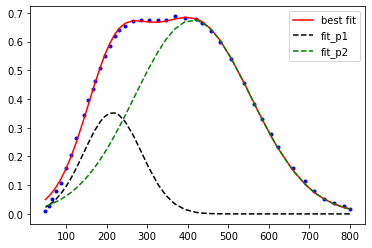

{'m2_A': 242.35055652547004, 'm2_μ': 412.10311032625697, 'm2_σ': 143.1862981768773, 'm1_A': 62.93352679725664, 'm1_μ': 214.58055720249183, 'm1_σ': 71.24981469108783}


In [8]:
# Gaussian
def g(x, A, μ, σ):
    return A/(σ*np.sqrt(2*np.pi)) * np.exp(-1/2*((x - μ) / σ)**2)

# "models.GaussianModel" below is from our new package "lmfit"
# model_1 = models.GaussianModel(prefix='m1_')
model_1=Model(g, prefix='m1_') # using my own definition
model_2=Model(g, prefix='m2_') # using my own definition
model = model_1 + model_2

params = Parameters()
#parameters given as: (NAME, Initial VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('m1_A', 175, True, None, None, None, None),
                ('m1_μ', 200, True, None, None, None, None),
                ('m1_σ', 100, True, None, None, None, None),
                ('m2_A', 175, True, None, None, None, None),
                ('m2_μ', 400, True, None, None, None, None),
                ('m2_σ', 100, True, None, None, None, None))

xdata=cal_dsc[:,0]
y=cal_dsc[:,1]

result = model.fit(y, params, x=xdata)
comps = result.eval_components()

plt.plot(xdata, y, 'b.')
plt.plot(xdata, result.best_fit, 'r-', label='best fit')
plt.plot(xdata, comps['m1_'], 'k--', label='fit_p1')
plt.plot(xdata, comps['m2_'], 'g--', label='fit_p2')
plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result.best_values)

In [10]:
# my fit to dsc data
fit_vals_gaussian=result.best_values
fit_vals_gaussian

{'m2_A': 242.35055652547004,
 'm2_μ': 412.10311032625697,
 'm2_σ': 143.1862981768773,
 'm1_A': 62.93352679725664,
 'm1_μ': 214.58055720249183,
 'm1_σ': 71.24981469108783}

In [ ]:
###  junk cell delete 

x = np.linspace(-10, 10, n) #generate our x data
noise=np.random.randn(n)
y = g(x, *g_0) + g(x, *g_1) + noise #generating some data with random noise
# the star operator used in the above line is discussed below

plt.plot(x, g(x, *g_0), 'r-'); #peak at 4
plt.plot(x, g(x, *g_1), 'r-'); #peak at -5

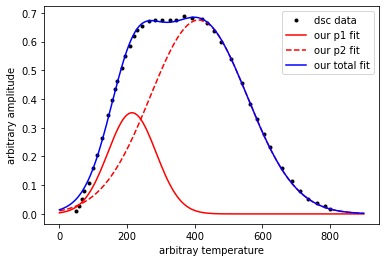

In [11]:
############# plot our fit to the dsc_data ###################
vals=fit_vals_gaussian
n = 150 # number of points
x = np.linspace(0, 900, n) #generate our x data
# recall our function g() has 4 params in this order g(x, )
fit_p1_gauss=g(x, vals['m1_A'], vals['m1_μ'],vals['m1_σ']) 
fit_p2_gauss=g(x, vals['m2_A'], vals['m2_μ'],vals['m2_σ'])
fit_dsc= fit_p1_gauss+fit_p2_gauss

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.', label='dsc data')
plt.plot(x, fit_p1_gauss, 'r-', label='our p1 fit'); 
plt.plot(x, fit_p2_gauss, 'r--', label='our p2 fit'); 
plt.plot(x, fit_dsc, 'b-', label='our total fit'); 
plt.ylabel('arbitrary amplitude');
plt.xlabel('arbitray temperature');
plt.legend(loc='best')
plt.show()

## Fit P1 and P2 peak data separately (now we need only 1 gaussian for the fits)

#### Note:  We are fitting the authors P1 and P2 fits given in the figure. 
<hr style="height:3px" \>

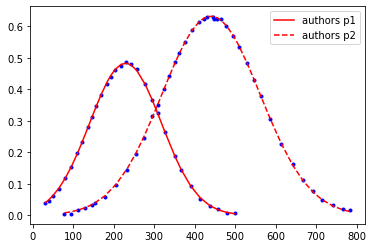

{'m1_A': 107.15042945247768, 'm1_μ': 229.1953886485958, 'm1_σ': 88.58647506677012}
{'m2_A': 192.337597711019, 'm2_μ': 440.18569306629587, 'm2_σ': 121.44458445610587}


In [12]:
model1=Model(g, prefix='m1_') 
model2=Model(g, prefix='m2_')

params = Parameters()
#parameters given as: (NAME, VALUE, VARY, MIN,  MAX,  EXPR,  BRUTE_STEP)
params.add_many(('m1_A', 300, True, None, None, None, None),
                ('m1_μ', 200, True, None, None, None, None),
                ('m1_σ', 100, True, None, None, None, None),
                ('m2_A', 300, True, None, None, None, None),
                ('m2_μ', 400, True, None, None, None, None),
                ('m2_σ', 100, True, None, None, None, None))

x1=cal_p1_auth[:,0]
y1=cal_p1_auth[:,1]
x2=cal_p2_auth[:,0]
y2=cal_p2_auth[:,1]

result1 = model1.fit(y1, params, x=x1)
result2 = model2.fit(y2, params, x=x2)

plt.plot(x1, y1, 'b.')
plt.plot(x2, y2, 'b.')
plt.plot(x1, result1.best_fit, 'r-', label='authors p1')
plt.plot(x2, result2.best_fit, 'r--', label='authors p2')
plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result1.best_values)
print(result2.best_values)

In [13]:
vals_auth_p1=result1.best_values
print(vals_auth_p1)
vals_auth_p2=result2.best_values
print(vals_auth_p2)

{'m1_A': 107.15042945247768, 'm1_μ': 229.1953886485958, 'm1_σ': 88.58647506677012}
{'m2_A': 192.337597711019, 'm2_μ': 440.18569306629587, 'm2_σ': 121.44458445610587}


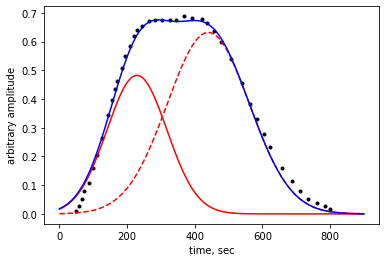

In [14]:
############# plot authors p1, p2 and sum ###################
vals1=vals_auth_p1
vals2=vals_auth_p2
n = 150 # number of points
x = np.linspace(0, 900, n) #generate our x data
# recall our function g() has 4 params in this order g(x, )
fit_auth_p1=g(x, vals1['m1_A'], vals1['m1_μ'],vals1['m1_σ']) 
fit_auth_p2=g(x, vals2['m2_A'], vals2['m2_μ'],vals2['m2_σ'])
fit_auth_dsc= fit_auth_p1+fit_auth_p2

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.')
plt.plot(x, fit_auth_p1, 'r-'); 
plt.plot(x, fit_auth_p2, 'r--'); 
plt.plot(x, fit_auth_dsc, 'b-'); 
plt.ylabel('arbitrary amplitude');
plt.xlabel('time, sec');

Compare our fit to the author's fit

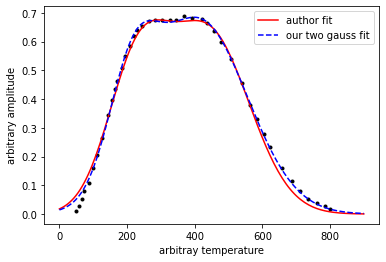

In [15]:
n = 150 # number of points
x = np.linspace(0, 900, n) #generate our x data

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.')
plt.plot(x, fit_auth_dsc, 'r-', label='author fit'); 
plt.plot(x, fit_dsc, 'b--', label='our two gauss fit'); 
plt.ylabel('arbitrary amplitude');
plt.xlabel('arbitray temperature');
plt.legend(loc="best")
plt.show()

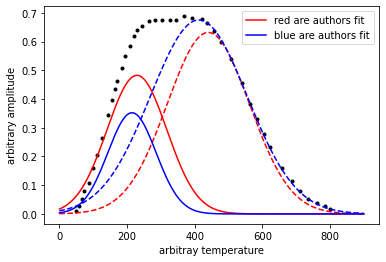

In [16]:
n = 150 # number of points
x = np.linspace(0, 900, n) #generate our x data

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.')
plt.plot(x, fit_auth_p1, 'r-', label='red are authors fit'); 
plt.plot(x, fit_auth_p2, 'r--'); 
plt.plot(x, fit_p1_gauss, 'b-',label='blue are authors fit'); 
plt.plot(x, fit_p2_gauss, 'b--'); 
plt.ylabel('arbitrary amplitude');
plt.xlabel('arbitray temperature');
plt.legend(loc='best')
plt.show()

### Let's keep track of variables at this point 
n = 150 # number of points  
x = np.linspace(0, 900, n) #generate our x data  

Calibrated data from the figure:
1. cal_dsc - DSC data measured
2. cal_p1_auth - authors p1 fit
3. cal_p2_auth - authors p2 fit

Author fit data: 
1. fit_auth_p1  
2. fit_auth_p2  
3. fit_auth_dsc  

Our gaussian fit data: 
1. fit_p1_gauss  
2. fit_p2_gauss  
3. fit_dsc  


## Fit to avrami kinetics

Avrami equation: $y=1-e^{-k\ t^n}$  e.g.  
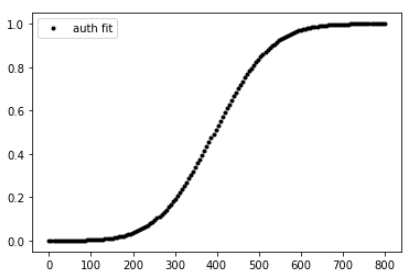

The derivative of the above "S" shaped avrami curve gives: $k n t^{n-1} e^{-k t^n}$ e.g.  
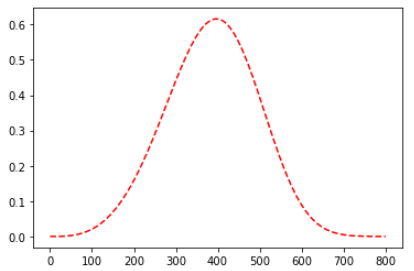

In normalized form (height = 1, peak position = 1): $e^{-\frac{(n-1) \left(t^n-1\right)}{n}} t^{n-1}$ e.g. for n = 3.1
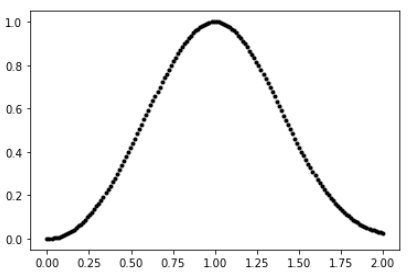

Now fitting to a variable peak height, A, and peak position , $\mu$ , and allowing our position variable to be $x$: 

## $$\text{A} e^{-\frac{(n-1) \left(\left(\frac{x}{\mu}\right)^n-1\right)}{n}} \left(\frac{x}{\mu}\right)^{n-1}$$  
For the case of A = 10 and $\mu$ = 400 and n = 3.1 we get: 
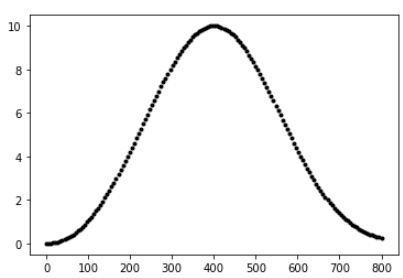

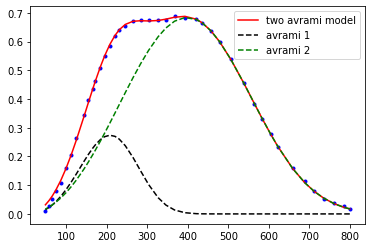

{'av2_A': 0.6841317630416386, 'av2_μ': 398.2186566942299, 'av2_n': 3.0817146603192587, 'av1_A': 0.2739085111187314, 'av1_μ': 208.35494066260355, 'av1_n': 3.4769324015341403}


In [17]:
# peak following avrami kinetics B = peak position
def pAvram(x, A, μ, n):
    return A*((x/μ)**(n-1))*np.exp(-((n-1)*(((x/μ)**n)-1))/n)



model_1=Model(pAvram, prefix='av1_') # using my own definition
model_2=Model(pAvram, prefix='av2_') # using my own definition
model = model_1 + model_2

params = Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
params.add_many(('av1_A', 5, True, 0, None, None, None),
                ('av1_μ', 200, True, 100,300, None, None),
                ('av1_n', 2.5, True, 2, 4, None, None),
                ('av2_A', 5, True, 0, None, None, None),
                ('av2_μ', 400, True, 300, 500, None, None),
                ('av2_n', 2.5, True, 2, 4, None, None))

x=cal_dsc[:,0]
y=cal_dsc[:,1]

result = model.fit(y, params, x=x)
comps = result.eval_components()

plt.plot(x, y, 'b.')
plt.plot(x, result.best_fit, 'r-', label='two avrami model')
plt.plot(x, comps['av1_'], 'k--', label='avrami 1')
plt.plot(x, comps['av2_'], 'g--', label='avrami 2')
plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result.best_values)

In [18]:
avram_fit=result.best_values
avram_fit

{'av2_A': 0.6841317630416386,
 'av2_μ': 398.2186566942299,
 'av2_n': 3.0817146603192587,
 'av1_A': 0.2739085111187314,
 'av1_μ': 208.35494066260355,
 'av1_n': 3.4769324015341403}

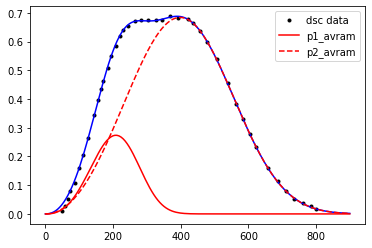

In [19]:
vals=avram_fit
n = 150 # number of points
x = np.linspace(0, 900, n) #generate our x data
# recall our function g() has 4 params in this order g(x, )
fit_p1_avram=pAvram(x, vals['av1_A'], vals['av1_μ'],vals['av1_n']) 
fit_p2_avram=pAvram(x, vals['av2_A'], vals['av2_μ'],vals['av2_n'])
fit_avram= fit_p1_avram+fit_p2_avram

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.', label='dsc data')
plt.plot(x, fit_avram, 'b-')
plt.plot(x, fit_p1_avram, 'r-', label="p1_avram")
plt.plot(x, fit_p2_avram, 'r--', label="p2_avram")
plt.legend(loc='best')
plt.show()

### Let's keep track of variables at this point 
n = 150 # number of points  
x = np.linspace(0, 900, n) #generate our x data  

Calibrated data from the figure:
1. cal_dsc - DSC data measured
2. cal_p1_auth - authors p1 fit
3. cal_p2_auth - authors p2 fit

Author fit data: 
1. fit_auth_p1  
2. fit_auth_p2  
3. fit_auth_dsc  

Our gaussian fit data: 
1. fit_p1_gauss  
2. fit_p2_gauss  
3. fit_dsc  

Our avrami based fit:
1. fit_p1_avram
2. fit_p2_avram
3. fit_avram

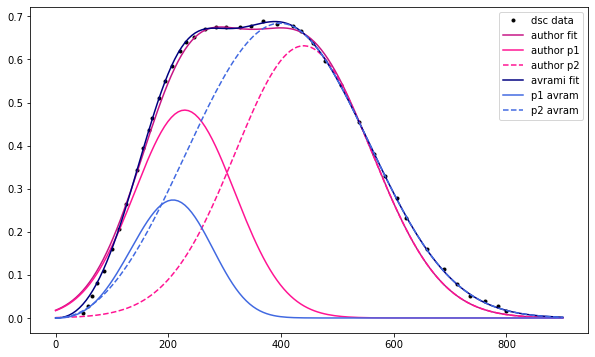

In [20]:
plt.figure(figsize=(10,6))

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.', label='dsc data')

plt.plot(x, fit_auth_dsc, '-', color='mediumvioletred',label='author fit'); 
plt.plot(x, fit_auth_p1, '-', color='deeppink',label='author p1'); 
plt.plot(x, fit_auth_p2, '--',color='deeppink',label='author p2'); 

#plt.plot(x, fit_dsc, '-', color='forestgreen', label='our gauss fit'); 
#plt.plot(x, fit_p1_gauss, '-', color='mediumseagreen', label='p1 gauss'); 
#plt.plot(x, fit_p2_gauss, '--', color='mediumseagreen', label='p2 gauss'); 

plt.plot(x, fit_avram, '-',color='navy', label='avrami fit')
plt.plot(x, fit_p1_avram, '-', color='royalblue', label="p1 avram")
plt.plot(x, fit_p2_avram, '--', color='royalblue', label="p2 avram")

plt.legend(loc='best')
plt.show()

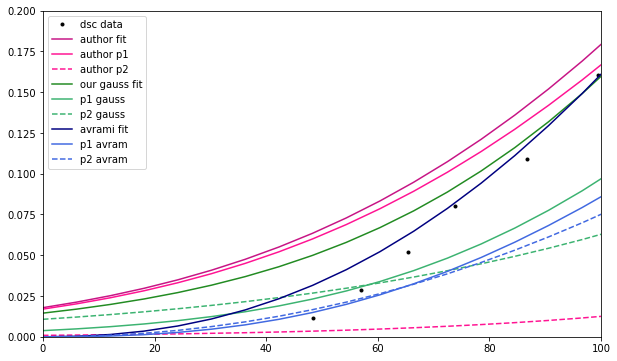

In [21]:
plt.figure(figsize=(10,6))

plt.plot(cal_dsc[:,0], cal_dsc[:,1], 'k.', label='dsc data')

plt.plot(x, fit_auth_dsc, '-', color='mediumvioletred',label='author fit'); 
plt.plot(x, fit_auth_p1, '-', color='deeppink',label='author p1'); 
plt.plot(x, fit_auth_p2, '--',color='deeppink',label='author p2'); 

plt.plot(x, fit_dsc, '-', color='forestgreen', label='our gauss fit'); 
plt.plot(x, fit_p1_gauss, '-', color='mediumseagreen', label='p1 gauss'); 
plt.plot(x, fit_p2_gauss, '--', color='mediumseagreen', label='p2 gauss'); 

plt.plot(x, fit_avram, '-',color='navy', label='avrami fit')
plt.plot(x, fit_p1_avram, '-', color='royalblue', label="p1 avram")
plt.plot(x, fit_p2_avram, '--', color='royalblue', label="p2 avram")

plt.xlim((0,100))
plt.ylim((0,0.2))

plt.legend(loc='best')
plt.show()

<hr style='height:3px' \> 
<hr style='height:3px' \>  

*********** Just me playing around with something - Ignore *************** 


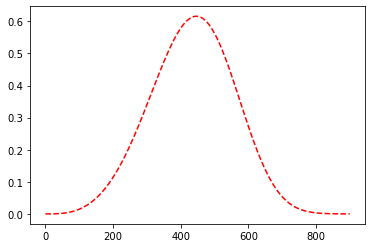

{'av1_A': 0.4778614164780477, 'av1_B': 228.0569597652629, 'av1_n': 3.0194419838155224}
{'av2_A': 0.6160422022361005, 'av2_B': 446.3145488435557, 'av2_n': 3.999999999999998}


In [22]:
def pAvram(x, A, B, n):
    return A*((x/B)**(n-1))*np.exp(-((n-1)*(((x/B)**n)-1))/n)

model1=Model(pAvram, prefix='av1_') # using my own definition
model2=Model(pAvram, prefix='av2_') # using my own definition

params = Parameters()
# add with tuples: (NAME VALUE VARY MIN  MAX  EXPR  BRUTE_STEP)
params.add_many(('av1_A', 5, True, 0, None, None, None),
                ('av1_B', 200, True, 100,300, None, None),
                ('av1_n', 2.5, True, 2, 4, None, None),
                ('av2_A', 5, True, 0, None, None, None),
                ('av2_B', 400, True, 300, 500, None, None),
                ('av2_n', 2.5, True, 2, 4, None, None))

x1=x
y1=fit_auth_p1
x2=x
y2=fit_auth_p2

result1 = model1.fit(y1, params, x=x1)
comps1 = result1.eval_components()
result2 = model2.fit(y2, params, x=x2)
comps2 = result2.eval_components()

#plt.plot(x1, y1, 'b.', label='auth p1 gauss')
#plt.plot(x2, y2, 'g.', label='auth p2 gauss')
#plt.plot(x1, result1.best_fit, 'r-', label='authors p1 fit w avrami')
plt.plot(x2, result2.best_fit, 'r--', label='authors p2 fit w avrami')
#plt.legend(loc='best')
plt.show()

#print(result.fit_report())
print(result1.best_values)
print(result2.best_values)

C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log10
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


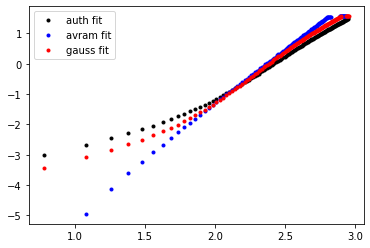

In [37]:

import numpy as np
from scipy.integrate import trapz, simps

n = 150 # number of points
x,dx = np.linspace(0, 900, n, retstep=True)

dd=fit_auth_p1
dd2=fit_p1_avram
dd3=fit_p1_gauss

data=[np.sum(dd[:n])*dx for n in np.arange(0,len(dd),1)]
data2=[np.sum(dd2[:n])*dx for n in np.arange(0,len(dd2),1)]
data3=[np.sum(dd3[:n])*dx for n in np.arange(0,len(dd3),1)]

plt.plot(np.log10(x), np.log10(-np.log(1-np.array(data)/max(data))), 'k.', label='auth fit');
plt.plot(np.log10(x), np.log10(-np.log(1-np.array(data2/max(data2)))),'b.', label='avram fit');
plt.plot(np.log10(x), np.log10(-np.log(1-np.array(data3/max(data3)))),'r.', label='gauss fit');
plt.legend(loc='best')
plt.show()

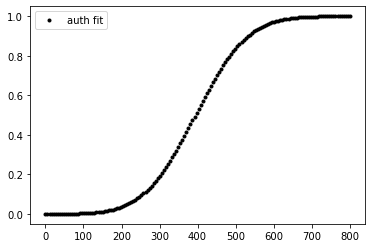

In [24]:
n = 150 # number of points
x,dx = np.linspace(0, 800, n, retstep=True)

dd=fit_auth_p2
data=[np.sum(dd[:n])*dx for n in np.arange(0,len(dd),1)]

plt.plot(x, np.array(data)/max(data),'k.',label='auth fit');
#plt.plot(x, np.array(data2)/max(data2),'b.',label='avram fit');

#plt.plot(x, np.array(data3)/max(data3),'r.',label='gauss fit');
plt.legend(loc="best")
plt.show()

In [25]:
auth_pts

NameError: name 'auth_pts' is not defined

C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
C:\Users\sgc\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log10
  app.launch_new_instance()
C:\Users\sgc\Anaconda3\lib\site-pac

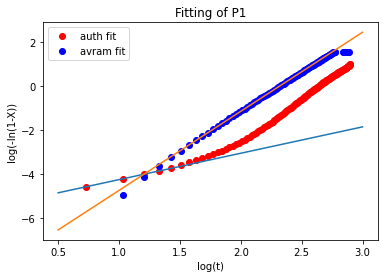

auth fit = [ 1.20004199 -5.43839259]
avram fit = [ 3.5968132 -8.3246054]


In [36]:
from scipy.optimize import curve_fit
def linear(x,m,b):
    return(m*x+b)

model=linear
nn=20
avfit_pts=np.log10(-np.log(1-np.array(data2)/max(data2)))
auth_pts=np.log10(-np.log(1-np.array(data)/max(data)))
#gauss_pts=np.log(-np.log(1-np.array(data3)/max(data3)))

popt1, _ = curve_fit(model, np.log10(x[1:5]), auth_pts[1:5])
popt2, _ = curve_fit(model, np.log10(x[5:50]), avfit_pts[5:50])
#popt3, _ = curve_fit(model, np.log(x[1:5]), gauss_pts[1:5])

plt.plot(np.log10(x), np.log10(-np.log(1-np.array(data)/max(data))), 'ro',label='auth fit');
plt.plot(np.log10(x), np.log10(-np.log(1-np.array(data2)/max(data2))),'bo',label='avram fit');
#plt.plot(np.log(x), np.log(-np.log(1-np.array(data3)/max(data3))),'r.',label='gauss fit');

xx=np.linspace(0.5,3,50)
plt.plot(xx, linear(xx, *popt1));
plt.plot(xx, linear(xx, *popt2));
#plt.plot(xx, linear(xx, *popt3));
plt.xlabel('log(t)')
plt.ylabel('log(-ln(1-X))')
plt.title('Fitting of P1')
plt.legend(loc="best")
plt.show()

print(f"auth fit = {popt1}")
print(f"avram fit = {popt2}")
#print(f"gauss fit = {popt3}")

Gaussian peak function: 
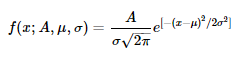

<hr style="height:6px" \>

## Appendix

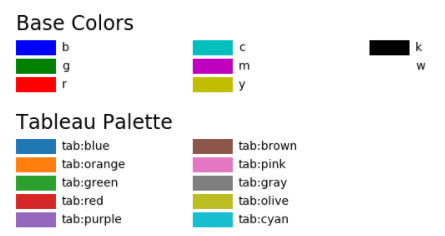
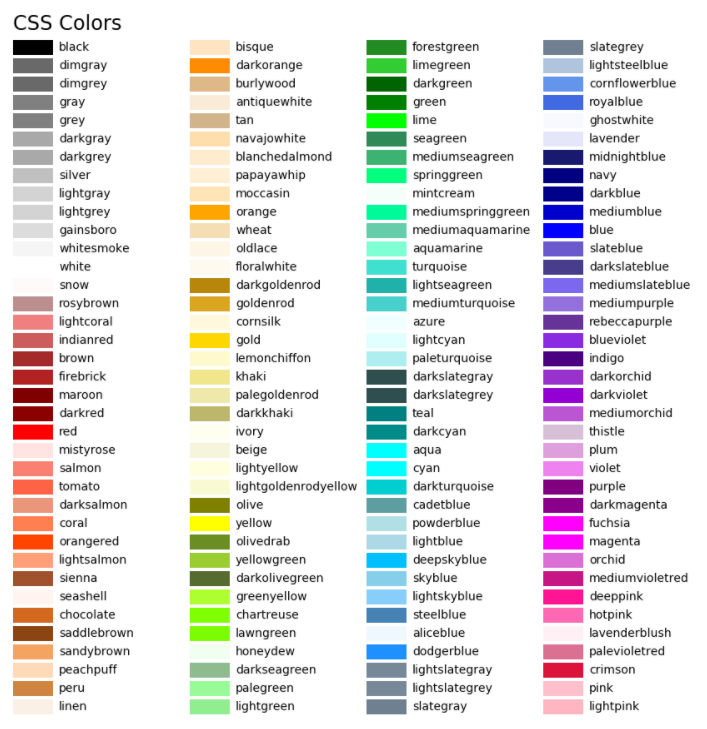